In [270]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
stock_list = ["AAPL","GOOGL","MSFT","SBUX","LNG","KHC","KO","TSLA","NVDA","COST"]
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in stock_list}

<AxesSubplot:xlabel='Date'>

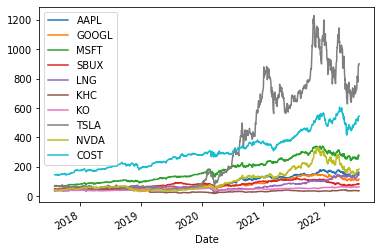

In [271]:
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items() })
volume = pd.DataFrame({ticker: data['Volume']
                     for ticker, data in all_data.items() })

price.plot()

In [272]:
file = open('correof.txt', 'w')
for main_stock in stock_list:
    for sub_stock in stock_list:
        if sub_stock == main_stock:
            continue
        else:
            corr = np.corrcoef(price[main_stock], price[sub_stock])
            file.write(main_stock + "," + sub_stock + " = " +  str(corr[0][1])+","+str(corr[1][0])+"\n")
    file.write("--------------------------------------------------------\n")
file.close()


In [273]:
stocks =   pd.concat([price[i] for i in stock_list],axis = 1)
log_ret = np.log(stocks/stocks.shift(1))

In [274]:
from tkinter import W
import numpy as np
np.random.seed(42)
num_ports = len(stock_list)*2000
num_stocks = len(stock_list)
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(num_stocks))
    weights = weights/np.sum(weights)

    
    # Save weights
    all_weights[x,:] = weights
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility

    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    

In [275]:
print("Max Sharpe Ratio =",sharpe_arr.max())
weights = {s:w for s,w in zip(stock_list,all_weights[sharpe_arr.argmax(),:])}
print("Allocation =",weights)
print("Return =",ret_arr[sharpe_arr.argmax()])
print("Risk =",vol_arr[sharpe_arr.argmax()])

Max Sharpe Ratio = 1.1733002648514537
Allocation = {'AAPL': 0.06797945834079691, 'GOOGL': 0.030590133894171836, 'MSFT': 0.11263819469123974, 'SBUX': 0.013988088446792769, 'LNG': 0.1272263924707515, 'KHC': 0.003617481559732938, 'KO': 0.22299682688205721, 'TSLA': 0.1262531845394066, 'NVDA': 0.001023680134924099, 'COST': 0.2936865590401265}
Return = 0.2528601801747682
Risk = 0.21551190922707383


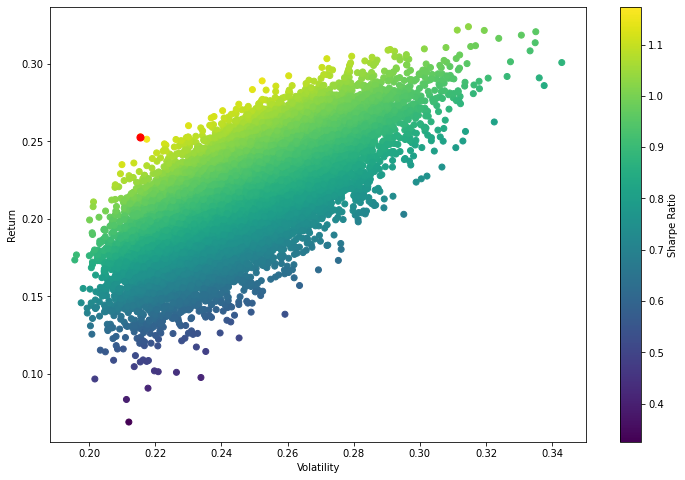

In [276]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(vol_arr[sharpe_arr.argmax()], ret_arr[sharpe_arr.argmax()],c='red', s=50) # red dot
plt.show()